# Обнаружение тренда в нестационарных временных рядах

## I Метод серий, основанных на медиане

15  >  9
3  <  14
NO TREND


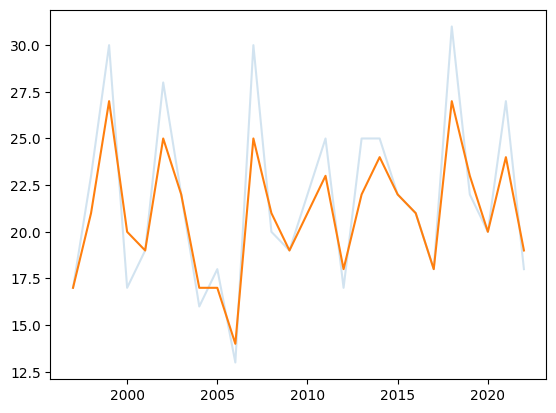

In [4]:
import pandas as pd
import numpy as np
import statistics as stats
import math
import seaborn as sns
import matplotlib.pyplot as plt


def smooth_exponential(series, *, a = None):
    if not a:
        a = 2 / (len(series) + 1)
    smoothed_series = series.copy()

    for i in range(1, len(series)):
        smoothed_series[i] = a * series[i] + (1 - a) * smoothed_series[i - 1]
    
    return smoothed_series


#bigmac_price = pd.read_csv('data/BigmacPrice.csv', parse_dates=True)
#bigmac_price = bigmac_price.loc[bigmac_price['currency_code'] == 'RUB']
#print(bigmac_price)

#data = np.array(bigmac_price['local_price'])
data_old = np.array([17, 23, 30, 17, 19, 28, 22, 16, 18,
                    13, 30, 20, 19, 22, 25, 17, 25, 25,
                    22, 21, 18, 31, 22, 20, 27, 18])
sns.lineplot(x=range(1997, 2023), y=data_old, alpha=0.2)
data = smooth_exponential(data_old, a=0.7)
sns.lineplot(x=range(1997, 2023), y=data)

median = stats.median(data)

greater_than_median = np.array([x > median for x in data if x != median])

series_amt = 1
series_maxlen = 0
series_len = 1
for i in range(greater_than_median.size - 1):
    if greater_than_median[i] != greater_than_median[i+1]:
        series_amt += 1
        if series_maxlen < series_len:
            series_maxlen = series_len
        series_len = 1
    else:
        series_len += 1
if series_maxlen < series_len:
    series_maxlen = series_len

print(series_amt, ' > ', math.floor((data.size + 2 - 1.96 * math.sqrt(data.size - 1)) / 2))
print(series_maxlen, ' < ', math.floor(3.3 * (math.log(data.size) + 1)))

requirement1 = series_amt > math.floor((data.size + 2 - 1.96 * math.sqrt(data.size - 1)) / 2)
requirement2 = series_maxlen < math.floor(3.3 * (math.log(data.size) + 1))
if requirement1 and requirement2:
    print('NO TREND')
else:
    print('TREND')

## II Критерий нисходящих и восходящих средних

In [5]:
import pandas as pd
import numpy as np
import statistics as stats
import math


#bigmac_price = pd.read_csv('data/BigmacPrice.csv', parse_dates=True)
#bigmac_price = bigmac_price.loc[bigmac_price['currency_code'] == 'RUB']
#print(bigmac_price)

#data = np.array(bigmac_price['local_price'])
data_old = np.array([17, 23, 30, 17, 19, 28, 22, 16, 18,
                    13, 30, 20, 19, 22, 25, 17, 25, 25,
                    22, 21, 18, 31, 22, 20, 27, 18])
data = smooth_exponential(data_old, a=0.7)
n = data.size

greater_than_prev = np.array([data[i+1] > data[i] for i in range(n-1) if data[i+1] != data[i]])

series_amt = 1
series_maxlen = 0
series_len = 1
for i in range(greater_than_prev.size - 1):
    if greater_than_prev[i] != greater_than_prev[i+1]:
        series_amt += 1
        if series_maxlen < series_len:
            series_maxlen = series_len
        series_len = 1
    else:
        series_len += 1
if series_maxlen < series_len:
    series_maxlen = series_len

print(series_amt, '>', math.floor((2*n-1) / 3 - 1.96 * math.sqrt((16*n - 29) / 90)))
print(series_maxlen, '<', 5)

requirement1 = series_amt > math.floor((2*n-1) / 3 - 1.96 * math.sqrt((16*n - 29) / 90))
requirement2 = series_maxlen < 5
if requirement1 and requirement2:
    print('NO TREND')
else:
    print('TREND')

14 > 12
3 < 5
NO TREND


## III Критерий, основанный на сравнении средних

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import statistics as stats
import math


#bigmac_price = pd.read_csv('data/BigmacPrice.csv', parse_dates=True)
#bigmac_price = bigmac_price.loc[bigmac_price['currency_code'] == 'RUB']
#print(bigmac_price)

#data = np.array(bigmac_price['local_price'])
data_old = np.array([17, 23, 30, 17, 19, 28, 22, 16, 18,
                    13, 30, 20, 19, 22, 25, 17, 25, 25,
                    22, 21, 18, 31, 22, 20, 27, 18])
data = smooth_exponential(data_old, a=0.7)
n = data.size

y1, y2 = data[:n//2], data[n//2:]

n1 = y1.size
n2 = y2.size

y1_avg = sum(y1) / n1
y2_avg = sum(y2) / n2

y1_var = sum((y_t - y1_avg)**2 for y_t in y1) / (n1 - 1)
y2_var = sum((y_t - y2_avg)**2 for y_t in y2) / (n2 - 1)

f_test = y1_var / y2_var if y1_var >= y2_var else y2_var / y1_var
a = 0.05

assert f_test < sps.f.ppf(1-a, n1-1, n2-1), 'F TEST H_1'

t = abs(y1_avg - y2_avg) * math.sqrt((n1 * n2 * (n1+n2-2)) / (n1 + n2)) / math.sqrt((n1-1)*y1_var + (n2-1)*y2_var)

if t < sps.t.ppf(1-a, n1+n2-2):
    print('NO TREND')
else:
    print('TREND')

NO TREND
